# Simulation of a Ball's Descend in a Terrain - Augmented Version 1.2

This project simulates where a ball will land in a terrain. It simulates the influence of Newton's law of universal gravitation on the movement of a ball, given by the formula $F=g\frac{m_1m_2}{r^2}$. Here, F is the resulting gravitational pull between the matching objects, $m_1$ and $m_2$ are their masses, r is the distance between the centers of their masses, and g is the gravitational constant.

## Input
The terrain's configuration is given as a matrix of integers representing elevation at each spot. This matrix is computed from a satellite image of a terrain that encodes altitude inside a pixel's <span style="color:red">*RED*</span> color component. For simplicity, assume that the terrain is surrounded by a wall, that prevents the ball to escape. The inner dimensions of the terrain are NxM, where N and M are integers.

The ball's initial position is given as a pair of integers (a, b).

## Output
The result is a list of coordinates denoting the ball's path in a terrain. The first element of the list is the starting position, and the last one is the ending position. It could happen that they are the same, if the ball has emanated from a local minima (dent).

## Rules
The ball moves according to the next two simple rules:
- The ball rolls from the current position into the lowest neighboring one.
- If the ball is surrounded by higher points, then it stops.

## Data Preparation

The next couple of cells prepare the terrain configuration for our simulator.

In [1]:
# Usual bootstrapping code; just run this cell.
import numpy as np
from ipywidgets import interact, widgets

In [2]:
import imageio

terrain = imageio.imread('terrain_data/coastline.jpg')
print("The terrain's dimensions are %s with minimum %i, maximum %i, and mean %.2f for points."% \
      (terrain.shape, terrain.min(), terrain.max(), terrain.mean()))

The terrain's dimensions are (3725, 4797, 3) with minimum 0, maximum 255, and mean 75.83 for points.


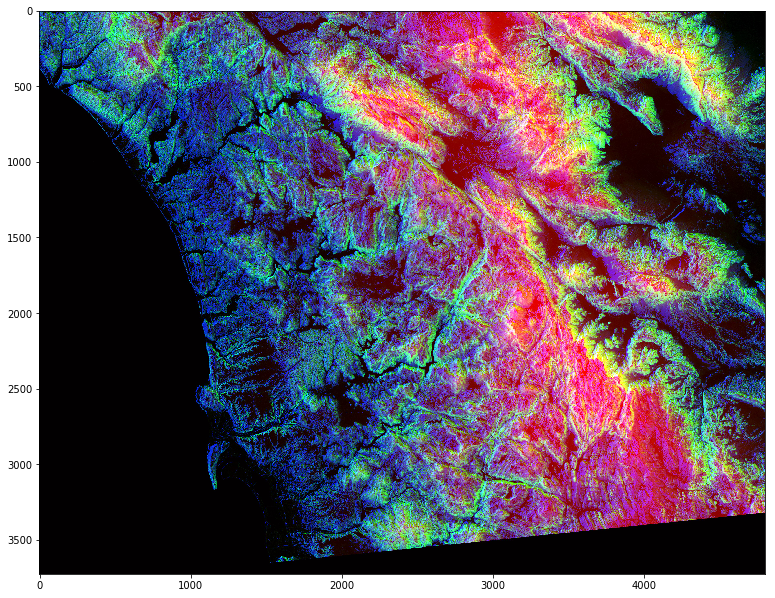

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 15))
plt.imshow(terrain);

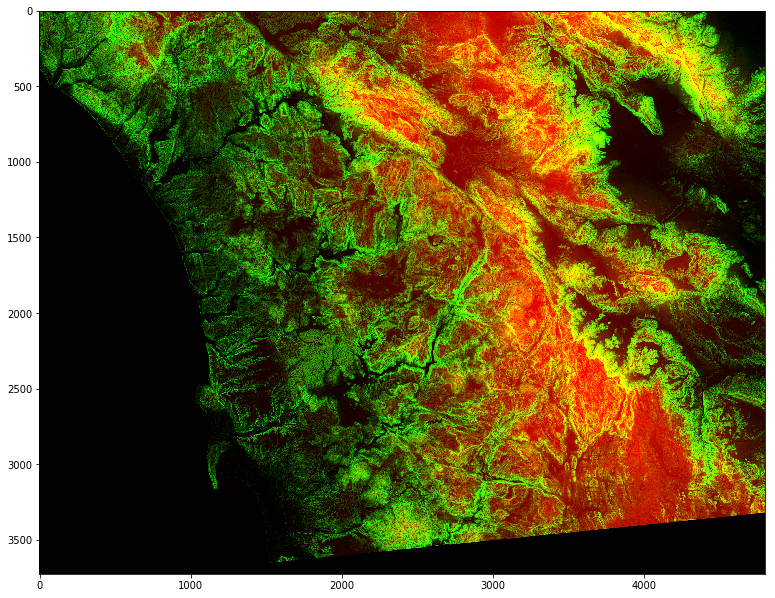

In [4]:
terrain[:, :, 2] = 0
plt.figure(figsize=(13, 15))
plt.imshow(terrain);

## Simple Test

In [5]:
# Test the simulator with a toy terrain; slope is set to zero, so only altitude matters.
test_terrain = np.array(
    [[(-2, 0), (3, 0),  (2, 0),  (1, 0)],
    [(-2, 0),  (4, 0),  (3, 0),  (0, 0)],
    [(-3, 0),  (3, 0),  (1, 0), (-3, 0)],
    [(-4, 0),  (2, 0), (-1, 0),  (1, 0)],
    [(-5, 0), (-7, 0),  (3, 0),  (0, 0)]])

from pathfinder import SimplePathFinder
path_finder = SimplePathFinder(test_terrain)
path_finder.find_path((1, 1))

[(1, 1), (2, 0), (3, 0), (4, 1)]

## Running the Simulator

The two code cells below implement the Input subystem for gathering the starting position.

In [6]:
%%html
<!-- Removes the default title "Figure 1" and button for an interactive session. -->
<style>
    .output_wrapper .ui-dialog-titlebar {display: None;}
</style>

<IPython.core.display.Javascript object>


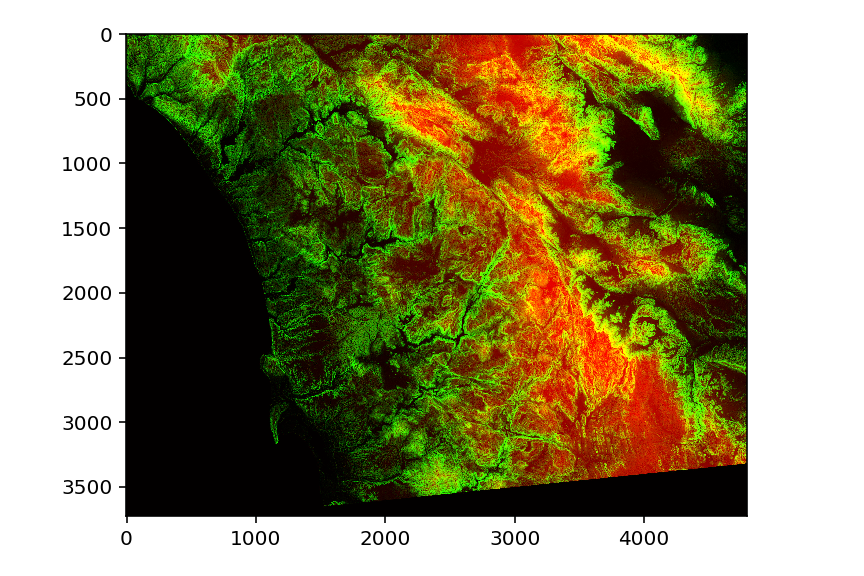

Textarea(value='', description='Position:', placeholder='Select a point on the map by clicking the mouse.')

In [19]:
%matplotlib notebook

from ipywidgets import Textarea
from interactionlib import InteractionMonitor

fig = plt.figure()
plt.imshow(terrain)

info_area = Textarea(
    value = '',
    placeholder = 'Select a point on the map by clicking the mouse.',
    description = 'Position:',
    disabled = False
)
display(info_area)

fig.tight_layout(pad = 1.3)
interaction_monitor = InteractionMonitor(fig, info_area)
interaction_monitor.start()

The cell below contains code to invoke the path finding function for a given starting position. The path is then encoded into terrain data and a new image is saved to disk.

[(2834, 3499), (2834, 3498), (2833, 3499), (2833, 3500), (2832, 3500), (2831, 3499), (2830, 3499)]


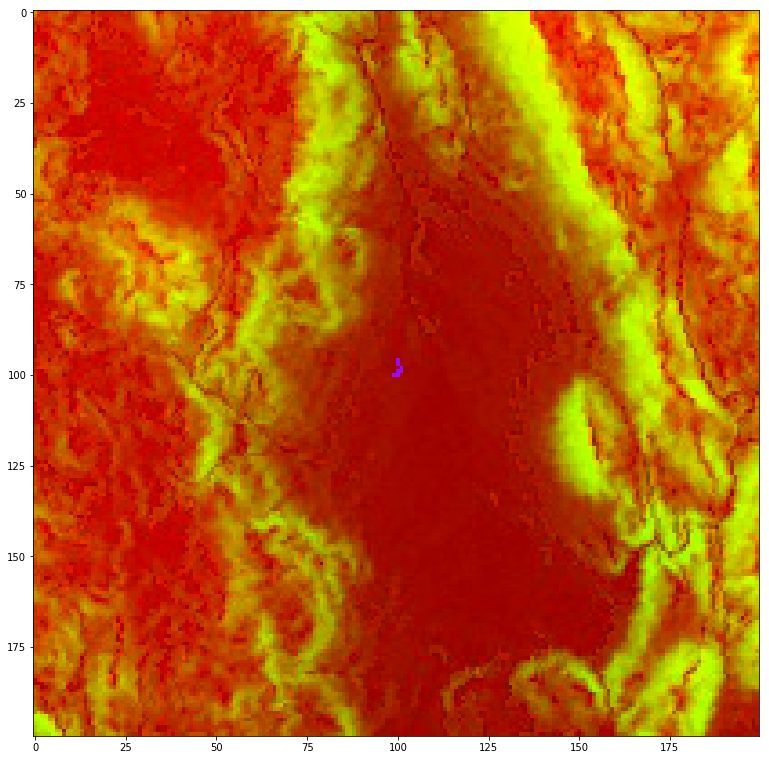

In [23]:
path_finder = SimplePathFinder(terrain)
x, y = interaction_monitor.clicked_position
calculated_path = path_finder.find_path((x, y))
print(calculated_path)

%matplotlib inline
from pathfinder import PathUtils

terrain = PathUtils.encode_path(terrain, calculated_path)
plt.figure(figsize=(13, 15))
# Zoom into area around the calculated path.
plt.imshow(terrain[max(x - 100, 0):min(x + 100, terrain.shape[0]), 
                   max(y - 100, 0):min(y + 100, terrain.shape[1])]);

new_image_path = 'terrain_data/coastline_with_path.jpg'
imageio.imwrite(new_image_path, terrain)